<table style="width:100%; border:none;">
  <tr>
    <td style="width:150px; text-align:center; vertical-align:middle;">
      <img src="https://upload.wikimedia.org/wikipedia/en/6/69/Seal_of_Pablo_de_Olavide_University.png" 
           alt="Emblema UPO" 
           style="width:130px; margin:10px;">
    </td>
    <td style="text-align:center; vertical-align:middle;">
      <h2 style="margin-bottom:5px;">Universidad Pablo de Olavide</h2>
      <p><strong>Grado en Ingeniería Informática en Sistemas de Información</strong></p>
      <p><strong>Asignatura: Inteligencia Artificial</strong></p>
      <p><strong>Curso 2025/2026</strong></p>
      <h3 style="margin-top:10px;">TRABAJO #1 – Equipo 08</h3>
      <h4 style="margin-top:5px;">Dataset asignado: Nº 17</h4>
      <p><strong>Integrantes:</strong> María Pérula Gutiérrez &nbsp;·&nbsp; Jonathan Javier Quishpe Maldonado</p>
      <p><strong>Fecha de entrega:</strong> 01/12/2025</p>
    </td>
  </tr>
</table>

<hr style="margin-top:25px; margin-bottom:25px; border: 1px solid #bbb;">
<h2 style="text-align:center;">Regresión Logística - Implementación</h2>

In [1]:
# REGRESIÓN LOGÍSTICA => Coche para estudiante

# Aquí usaremos la regresión logística para separar los coches de nuestro dataset en dos grupos:
#   1 -> coche recomendable para un estudiante universitario
#   0 -> coche que no lo es
#
# Para decidir qué coche es bueno para estudiante nos hemos guiado por caracteristicas de un alumno medio de universidad:
#   - que no sea muy caro,
#   - que gaste poco (economy alta),
#   - que no esté en muy mal estado para no tener muchas averias (condition decente)
#
# Por lo que definiremos una variable binaria (estudiante_ok), y como variables de entrada: price, km, economy, condition y rating. A partir de ahí aplicaremos exactamente
# el esquema de regresión logística de la EPD 3

### 1. Importaciones y lectura del dataset

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df = df.rename(columns={"current price": "price"})

In [4]:
#Creamos la variable binaria de estudiante_ok
precio_medio = df["price"].mean()

df["estudiante_ok"] = ((df["economy"] >= 8) & (df["condition"] >= 3) & (df["price"] <= precio_medio)).astype(int)

print("Primeras filas + estudiante_ok:\n")
print(df[["price", "km", "economy", "condition", "rating", "estudiante_ok"]].head())

Primeras filas + estudiante_ok:

      price      km  economy  condition  rating  estudiante_ok
0  351318.0   78945       14          2       1              0
1  285001.5  117220        9          9       5              1
2  215386.0  132538       15          8       2              1
3  244295.5  101065       11          3       4              1
4  531114.5   61559       12          9       3              0


### 2. Variables de entrada X y la clase y

In [5]:
columnas_X = ["price", "km", "economy", "condition", "rating"]
#X = df[columnas_X].copy()
X_raw = df[columnas_X].copy()
y = df[["estudiante_ok"]].copy()

#Normalizamos porque nos sale "overflow encountered in exp" en punto "6. Theta, coste y gradiente iniciales"
def featureNormalize(X):
    media = X.mean()
    desv = X.std()
    X_norm = (X - media) / desv
    return X_norm, media, desv

X_norm, media_log, desv_log = featureNormalize(X_raw)

# Columna de unos
#unos = np.ones(len(X))
#X.insert(0, "ones", unos)
#print("\nShape de X:", X.shape)
#print("Shape de y:", y.shape)

unos = np.ones(len(X_norm))
X = X_norm.copy()
X.insert(0, "ones", unos)

print("\nShape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (1000, 6)
Shape de y: (1000, 1)


### 3. Función sigmoide

In [6]:
def sigmoid(z):
    denominador = 1 + np.exp(-z)
    g = 1 / denominador
    return g

### 4. Función coste (vectorizada)

In [7]:
def costFunction(theta, X, y):
    m = len(y)
    Xn = X.values # m,n
    yn = y # yn vector de 1D
    z = Xn.dot(theta) # m
    
    h = sigmoid(z) #m
   #Evitamos el log(0) ya que nha encontrado valores 0 o 1 en "6. Theta, coste y gradiente iniciales"
    eps = 1e-8
    h = np.clip(h, eps, 1 - eps)
    
    termino1 = yn * np.log(h)
    termino2 = (1 - yn) * np.log(1 - h)

    J = (-1/m) * np.sum(termino1 + termino2)
    return J

### 5. Función gradiente (vectorizada)

In [8]:
def gradientFunction(theta, X, y):
    m = len(y)
    Xn = X.values
    yn = y
    z = Xn.dot(theta)
    h = sigmoid(z)
    grad = (1/m) * (Xn.T.dot(h - yn)) # n
    return grad

### 6. Theta, coste y gradiente iniciales

In [9]:
n_param = X.shape[1]
theta_ini = np.zeros(n_param) #vector 1D
y_vec = y.to_numpy().flatten() #m

print("\nCoste inicial con theta (0): ", costFunction(theta_ini, X, y_vec))
print("Gradiente inicial: \n", gradientFunction(theta_ini, X, y_vec))

#Para la gráfica
cost_history_log = []
def guardar_coste_log(theta):
    c = costFunction(theta, X, y_vec)
    cost_history_log.append(c)

# Optimizacion fmin_cg
theta_opt = op.fmin_cg(
    f = costFunction,
    x0 = theta_ini,
    fprime = gradientFunction,
    args = (X, y_vec),
    maxiter = 400,
    callback = guardar_coste_log
)

print("\nTheta optimo:")
print(theta_opt)


Coste inicial con theta (0):  0.6931471805599454
Gradiente inicial: 
 [ 0.092       0.3397436  -0.33782546 -0.01927776 -0.09611219  0.0307273 ]
Optimization terminated successfully.
         Current function value: 0.289499
         Iterations: 20
         Function evaluations: 63
         Gradient evaluations: 63

Theta optimo:
[-1.04196569 -3.10130639  0.22287656  0.03599764  1.41479513 -0.19275264]


### 7. Gráfica de convergencia

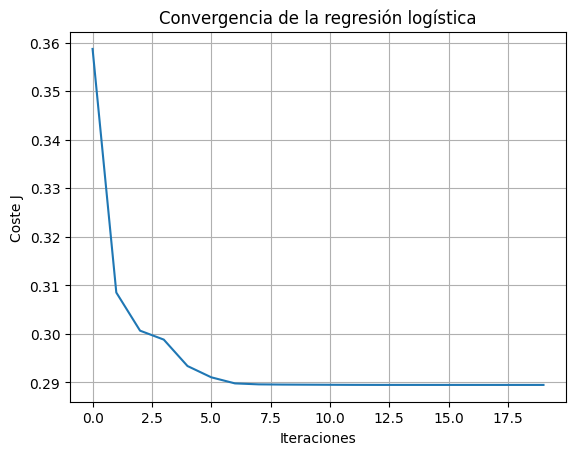

In [10]:
plt.plot(cost_history_log)
plt.xlabel("Iteraciones")
plt.ylabel("Coste J")
plt.title("Convergencia de la regresión logística")
plt.grid(True)
plt.show()

### 7. Predicciones

In [11]:
def predict(theta, X, bool_round=True):
    Xn = X.values
    z = Xn.dot(theta)
    probs = sigmoid(z)
    if bool_round:
        return np.round(probs)
    else:
        return probs

# Necesitamos: Coche barato, con pocos km, que tenga buena economía con una condición decente y un rating medio aceptable
# Valores seleccionados [price, km, economy, condition, rating]
ejemplo_coche_raw = [200000, 50000, 9, 4, 4]

# Normalizamos usando media/desviación qdel entrenamiento
ejemplo_norm = (np.array(ejemplo_coche_raw) - media_log.values) / desv_log.values

# Añadimos el 1 inicial
fila_ejemplo = np.insert(ejemplo_norm, 0, 1)  # [1, price, km, economy, condition, rating]

df_ejemplo = pd.DataFrame([fila_ejemplo], columns=X.columns)

ej_prob = predict(theta_opt, df_ejemplo, bool_round=False)
ej_clase = predict(theta_opt, df_ejemplo, bool_round=True)

print("\nEjemplo de coche para estudiante:")
print("Características originales (sin normalizar):", ejemplo_coche_raw)
print("Probabilidad de ser 'estudiante_ok':", float(ej_prob[0]))
print("Predicción (0/1):", int(ej_clase[0]))


Ejemplo de coche para estudiante:
Características originales (sin normalizar): [200000, 50000, 9, 4, 4]
Probabilidad de ser 'estudiante_ok': 0.5656923972207067
Predicción (0/1): 1


### 8. Evaluacón del modelo (accuracy/matriz de confusión)

In [12]:
y_pred = predict(theta_opt, X, bool_round=True)
y_real = y_vec

accuracy = np.mean(y_pred == y_real)
print("\nAccuracy del modelo (sobre todos los datos):", accuracy)

# Matriz de confusión sencilla
TP = np.sum((y_real == 1) & (y_pred == 1))
TN = np.sum((y_real == 0) & (y_pred == 0))
FP = np.sum((y_real == 0) & (y_pred == 1))
FN = np.sum((y_real == 1) & (y_pred == 0))

print("\nMatriz de confusión:")
print("TP (1 bien predicho):", TP)
print("TN (0 bien predicho):", TN)
print("FP (0 mal predicho como 1):", FP)
print("FN (1 mal predicho como 0):", FN)


Accuracy del modelo (sobre todos los datos): 0.853

Matriz de confusión:
TP (1 bien predicho): 333
TN (0 bien predicho): 520
FP (0 mal predicho como 1): 72
FN (1 mal predicho como 0): 75


In [13]:
# Conclusiones: El modelo de regresión logística para estudiante_ok da un accuracy de 0.85 (85%), acierta aproximadamente 8 de cada 10 coches, que está bastante bien
# para las 5 variables que usamos.
#
# La matriz de confusión muestra que acierta bastantes ok y no ok, aunque hay algunos coches buenos que descarta y otros que sobrevalora, algo típico en este modelo sencillo.
#
# Viendo las gráficas de price vs economy, tanto los datos reales como las predicciones siguen la idea que teníamos: los coches más baratos y con mejor
# economía son los que salen como buenos para un estudiante.

### 9. Gráfico clasificación de los datos de nuestro dataset

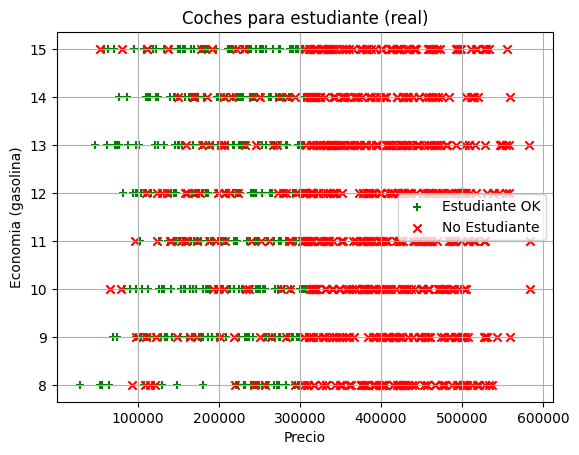

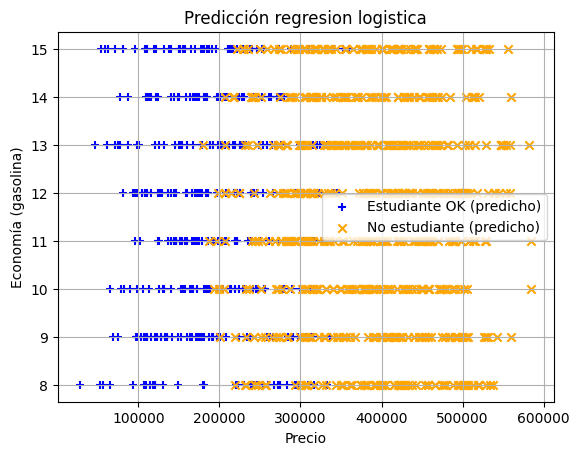

In [14]:
# En nuestro caso estamos usando 5 variables para saber si un coche es apropiado para un estudiante medio, pero como no se puede dibujar en 5D,
# hemos pensado en observar estas gráficas con dos variables bastante significativas en este caso: price y economy.
# Un estudiante principalmente (según nuestro criterio), se fija en estas dos opciones.

import matplotlib.pyplot as plt

# Dibujamos los puntos reales segun la clase
def plot_estudiante_real(df):
    
    df_ok = df[df["estudiante_ok"] == 1]
    df_no = df[df["estudiante_ok"] == 0]

    plt.scatter(df_ok["price"], df_ok["economy"], c="g", marker="+", label="Estudiante OK")
    plt.scatter(df_no["price"], df_no["economy"], c="r", marker="x", label="No Estudiante")

    plt.xlabel("Precio")
    plt.ylabel("Economia (gasolina)")
    plt.title("Coches para estudiante (real)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Dibujamos lo que predice nuestra regresion logistica
def plot_estudiante_pred(df_clasif):
    
    df_ok = df_clasif[df_clasif["pred_clase"] == 1]
    df_no = df_clasif[df_clasif["pred_clase"] == 0]

    plt.scatter(df_ok["price"], df_ok["economy"], c="b", marker="+", label="Estudiante OK (predicho)")
    plt.scatter(df_no["price"], df_no["economy"], c="orange", marker="x", label="No estudiante (predicho)")

    plt.xlabel("Precio")
    plt.ylabel("Economía (gasolina)")
    plt.title("Predicción regresion logistica")
    plt.legend()
    plt.grid(True)
    plt.show()


# Clasificamos el dataset con el modelo aprendido
pred_clase = predict(theta_opt, X, bool_round=True)

df_clasificado = df.copy()
df_clasificado["pred_clase"] = pred_clase

# Gráfica del real
plot_estudiante_real(df)

# Gráfica del predicho
df_clasificado_plot = df_clasificado.copy()
df_clasificado_plot["price"] = df["price"]
df_clasificado_plot["economy"] = df["economy"]

plot_estudiante_pred(df_clasificado_plot)

In [15]:
# En la gráfica real se ve que los coches marcados como “estudiante_ok” suelen ser los más baratos y con mejor economía, 
# algo que nos suena lógico, y que es lo que pensamos como importante para un estudiante.
# En la gráfica de predicción el modelo sigue ese mismo patrón, aunque tiende a poner más coches como “no ok”. Aun así, 
# los puntos predichos como buenos aparecen justo en la zona esperada (precio más bajo y buena economía), y aunque nuestro
# modelo usa 5 variables y aquí solo se ven 2, la predicción tiene sentido, ya que usamos dos carácteristicas muy significativas para ello (economía de consumo (gasto mensual) 
# y precio de compra del coche).

#La precisión obtenida en nuestro modelo se presenta bastante buena (85%).

---
## MODIFICACIÓN 6: Experimento con Modelos Cuadráticos

En esta sección implementaremos un modelo de regresión logística con características cuadráticas. En lugar de usar la combinación lineal tradicional:

$$h_{\theta}(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$

Usaremos una combinación cuadrática:

$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2$$

Seleccionaremos **km** y **condition** como las dos variables principales, ya que son las más significativas para clasificar un coche como apropiado para estudiantes (bajo kilometraje y buen estado del vehículo son criterios clave).

### 10. Preparación de datos para el modelo cuadrático

In [16]:
# Seleccionamos dos variables: km y condition
# Estas son las más representativas según nuestros análisis anteriores

# Extraemos las dos columnas seleccionadas del dataframe original
X_cuad_raw = df[["km", "condition"]].copy()
y_cuad = df["estudiante_ok"].copy()

# Normalizamos las características originales
X_cuad_norm, media_cuad, desv_cuad = featureNormalize(X_cuad_raw)

print("Variables seleccionadas para el modelo cuadrático:")
print("  - x1: km")
print("  - x2: condition")
print("\nShape de X_cuad_norm:", X_cuad_norm.shape)
print("Shape de y_cuad:", y_cuad.shape)
print("\nPrimeras filas normalizadas:")
print(X_cuad_norm.head())

Variables seleccionadas para el modelo cuadrático:
  - x1: km
  - x2: condition

Shape de X_cuad_norm: (1000, 2)
Shape de y_cuad: (1000,)

Primeras filas normalizadas:
         km  condition
0 -0.731701  -1.271752
1  0.581314   1.206607
2  1.106794   0.852556
3  0.027120  -0.917701
4 -1.328124   1.206607


### 11. Creación de características cuadrádicas

In [ ]:
# Creamos las características cuadrádicas
# z = θ0 + θ1*x1 + θ2*x2 + θ3*x1ˆ2 + θ4*x2ˆ2 + θ5*x1*x2

x1 = X_cuad_norm["km"].values
x2 = X_cuad_norm["condition"].values

# Creamos el dataframe con todas las características (lineales y cuadráticas)
X_cuad_expandido = pd.DataFrame({
    "ones": np.ones(len(X_cuad_norm)),
    "x1": x1,                    # θ1: km
    "x2": x2,                    # θ2: condition
    "x1_squared": x1**2,         # θ3: kmˆ2
    "x2_squared": x2**2,         # θ4: conditionˆ2
    "x1_x2": x1 * x2             # θ5: km * condition
})

print("Características cuadráticas creadas:")
print(X_cuad_expandido.columns.tolist())
print("\nShape de X_cuad_expandido:", X_cuad_expandido.shape)
print("Ahora tenemos 6 parámetros θ (incluyendo θ0)")
print("\nPrimeras filas:")
print(X_cuad_expandido.head())

Características cuadráticas creadas:
['ones', 'x1', 'x2', 'x1_squared', 'x2_squared', 'x1_x2']

Shape de X_cuad_expandido: (1000, 6)
Ahora tenemos 6 parámetros θ (incluyendo θ0)

Primeras filas:
   ones        x1        x2  x1_squared  x2_squared     x1_x2
0   1.0 -0.731701 -1.271752    0.535387    1.617354  0.930543
1   1.0  0.581314  1.206607    0.337926    1.455900  0.701417
2   1.0  1.106794  0.852556    1.224994    0.726851  0.943604
3   1.0  0.027120 -0.917701    0.000736    0.842175 -0.024888
4   1.0 -1.328124  1.206607    1.763913    1.455900 -1.602524


### 12. Entrenamiento del modelo cuadrático

**Nota importante:** Las funciones `costFunction` y `gradientFunction` **NO cambian**. La regresión logística sigue siendo la misma, solo que ahora la matriz X tiene más columnas (características cuadráticas). El algoritmo de optimización (descenso del gradiente) funciona exactamente igual, pero ahora estima 6 parámetros θ en lugar de 3.

In [ ]:
# Inicializamos theta para el modelo cuadrático (6 parámetros)
n_param_cuad = X_cuad_expandido.shape[1]
theta_ini_cuad = np.zeros(n_param_cuad)
y_cuad_vec = y_cuad.to_numpy().flatten()

print("Número de parámetros θ en el modelo cuadrático:", n_param_cuad)
print("\nCoste inicial con theta cuadrático (todos 0):", costFunction(theta_ini_cuad, X_cuad_expandido, y_cuad_vec))
print("\nGradiente inicial:")
print(gradientFunction(theta_ini_cuad, X_cuad_expandido, y_cuad_vec))

# Historial de costes para la gráfica
cost_history_cuad = []

def guardar_coste_cuad(theta):
    c = costFunction(theta, X_cuad_expandido, y_cuad_vec)
    cost_history_cuad.append(c)

# Optimización con fmin_cg
print("\n" + "="*60)
print("Iniciando optimización del modelo cuadrático...")
print("="*60)

theta_opt_cuad = op.fmin_cg(
    f=costFunction,
    x0=theta_ini_cuad,
    fprime=gradientFunction,
    args=(X_cuad_expandido, y_cuad_vec),
    maxiter=400,
    callback=guardar_coste_cuad
)

print("\n" + "="*60)
print("Theta óptimo del modelo cuadrático:")
print("="*60)
print(f"θ0 (intercepto):     {theta_opt_cuad[0]:.6f}")
print(f"θ1 (km):             {theta_opt_cuad[1]:.6f}")
print(f"θ2 (condition):      {theta_opt_cuad[2]:.6f}")
print(f"θ3 (kmˆ2):            {theta_opt_cuad[3]:.6f}")
print(f"θ4 (conditionˆ2):     {theta_opt_cuad[4]:.6f}")
print(f"θ5 (km×condition):   {theta_opt_cuad[5]:.6f}")
print("="*60)

Número de parámetros θ en el modelo cuadrático: 6

Coste inicial con theta cuadrático (todos 0): 0.6931471805599454

Gradiente inicial:
[ 0.092      -0.33782546 -0.09611219  0.10069362  0.22916548 -0.11016998]

Iniciando optimización del modelo cuadrático...
Optimization terminated successfully.
         Current function value: 0.158625
         Iterations: 24
         Function evaluations: 81
         Gradient evaluations: 81

Theta óptimo del modelo cuadrático:
θ0 (intercepto):     1.311597
θ1 (km):             5.992138
θ2 (condition):      0.004601
θ3 (km²):            -0.999863
θ4 (condition²):     -2.144751
θ5 (km×condition):   3.269275


### 13. Comparación de convergencia: Modelo Lineal vs Cuadrático

Optimization terminated successfully.
         Current function value: 0.338181
         Iterations: 10
         Function evaluations: 29
         Gradient evaluations: 29


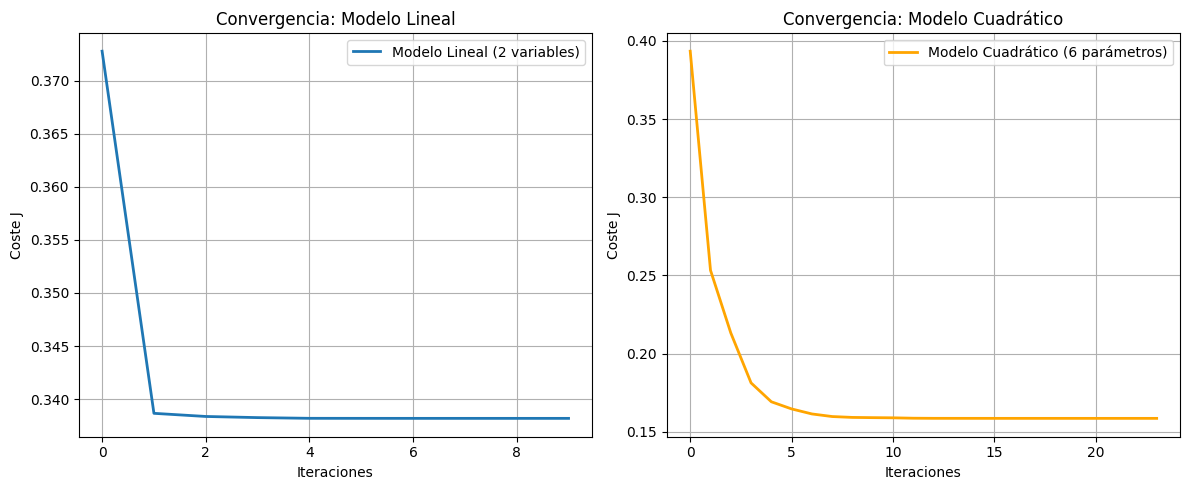

Coste final modelo lineal: 0.338181
Coste final modelo cuadrático: 0.158625


In [19]:
# Para comparar, entrenamos también un modelo lineal con solo km y condition
X_lineal = X_cuad_norm.copy()
X_lineal.insert(0, "ones", np.ones(len(X_lineal)))

theta_ini_lineal = np.zeros(X_lineal.shape[1])
cost_history_lineal = []

def guardar_coste_lineal(theta):
    c = costFunction(theta, X_lineal, y_cuad_vec)
    cost_history_lineal.append(c)

theta_opt_lineal = op.fmin_cg(
    f=costFunction,
    x0=theta_ini_lineal,
    fprime=gradientFunction,
    args=(X_lineal, y_cuad_vec),
    maxiter=400,
    callback=guardar_coste_lineal
)

# Gráfica comparativa
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history_lineal, label="Modelo Lineal (2 variables)", linewidth=2)
plt.xlabel("Iteraciones")
plt.ylabel("Coste J")
plt.title("Convergencia: Modelo Lineal")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cost_history_cuad, label="Modelo Cuadrático (6 parámetros)", color='orange', linewidth=2)
plt.xlabel("Iteraciones")
plt.ylabel("Coste J")
plt.title("Convergencia: Modelo Cuadrático")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Coste final modelo lineal: {cost_history_lineal[-1]:.6f}")
print(f"Coste final modelo cuadrático: {cost_history_cuad[-1]:.6f}")

### 14. Evaluación del modelo cuadrático

In [20]:
# Predicciones del modelo cuadrático
y_pred_cuad = predict(theta_opt_cuad, X_cuad_expandido, bool_round=True)
y_pred_lineal = predict(theta_opt_lineal, X_lineal, bool_round=True)

# Accuracy
accuracy_cuad = np.mean(y_pred_cuad == y_cuad_vec)
accuracy_lineal = np.mean(y_pred_lineal == y_cuad_vec)

print("="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)
print(f"Accuracy Modelo Lineal:     {accuracy_lineal:.4f} ({accuracy_lineal*100:.2f}%)")
print(f"Accuracy Modelo Cuadrático: {accuracy_cuad:.4f} ({accuracy_cuad*100:.2f}%)")
print(f"Mejora:                     {(accuracy_cuad - accuracy_lineal)*100:.2f}%")
print("="*60)

# Matrices de confusión
print("\nMATRIZ DE CONFUSIÓN - MODELO LINEAL:")
print("-" * 40)
TP_lin = np.sum((y_cuad_vec == 1) & (y_pred_lineal == 1))
TN_lin = np.sum((y_cuad_vec == 0) & (y_pred_lineal == 0))
FP_lin = np.sum((y_cuad_vec == 0) & (y_pred_lineal == 1))
FN_lin = np.sum((y_cuad_vec == 1) & (y_pred_lineal == 0))
print(f"TP (1 bien predicho):        {TP_lin}")
print(f"TN (0 bien predicho):        {TN_lin}")
print(f"FP (0 mal predicho como 1):  {FP_lin}")
print(f"FN (1 mal predicho como 0):  {FN_lin}")

print("\nMATRIZ DE CONFUSIÓN - MODELO CUADRÁTICO:")
print("-" * 40)
TP_cuad = np.sum((y_cuad_vec == 1) & (y_pred_cuad == 1))
TN_cuad = np.sum((y_cuad_vec == 0) & (y_pred_cuad == 0))
FP_cuad = np.sum((y_cuad_vec == 0) & (y_pred_cuad == 1))
FN_cuad = np.sum((y_cuad_vec == 1) & (y_pred_cuad == 0))
print(f"TP (1 bien predicho):        {TP_cuad}")
print(f"TN (0 bien predicho):        {TN_cuad}")
print(f"FP (0 mal predicho como 1):  {FP_cuad}")
print(f"FN (1 mal predicho como 0):  {FN_cuad}")

# Precision y Recall
precision_cuad = TP_cuad / (TP_cuad + FP_cuad) if (TP_cuad + FP_cuad) > 0 else 0
recall_cuad = TP_cuad / (TP_cuad + FN_cuad) if (TP_cuad + FN_cuad) > 0 else 0
f1_cuad = 2 * (precision_cuad * recall_cuad) / (precision_cuad + recall_cuad) if (precision_cuad + recall_cuad) > 0 else 0

precision_lin = TP_lin / (TP_lin + FP_lin) if (TP_lin + FP_lin) > 0 else 0
recall_lin = TP_lin / (TP_lin + FN_lin) if (TP_lin + FN_lin) > 0 else 0
f1_lin = 2 * (precision_lin * recall_lin) / (precision_lin + recall_lin) if (precision_lin + recall_lin) > 0 else 0

print("\n" + "="*60)
print("MÉTRICAS ADICIONALES")
print("="*60)
print(f"{'Métrica':<20} {'Lineal':<15} {'Cuadrático':<15}")
print("-" * 60)
print(f"{'Precision':<20} {precision_lin:<15.4f} {precision_cuad:<15.4f}")
print(f"{'Recall':<20} {recall_lin:<15.4f} {recall_cuad:<15.4f}")
print(f"{'F1-Score':<20} {f1_lin:<15.4f} {f1_cuad:<15.4f}")
print("="*60)

COMPARACIÓN DE MODELOS
Accuracy Modelo Lineal:     0.8470 (84.70%)
Accuracy Modelo Cuadrático: 0.9330 (93.30%)
Mejora:                     8.60%

MATRIZ DE CONFUSIÓN - MODELO LINEAL:
----------------------------------------
TP (1 bien predicho):        331
TN (0 bien predicho):        516
FP (0 mal predicho como 1):  76
FN (1 mal predicho como 0):  77

MATRIZ DE CONFUSIÓN - MODELO CUADRÁTICO:
----------------------------------------
TP (1 bien predicho):        373
TN (0 bien predicho):        560
FP (0 mal predicho como 1):  32
FN (1 mal predicho como 0):  35

MÉTRICAS ADICIONALES
Métrica              Lineal          Cuadrático     
------------------------------------------------------------
Precision            0.8133          0.9210         
Recall               0.8113          0.9142         
F1-Score             0.8123          0.9176         


### 15. Visualización de la frontera de decisión

Generando fronteras de decisión...



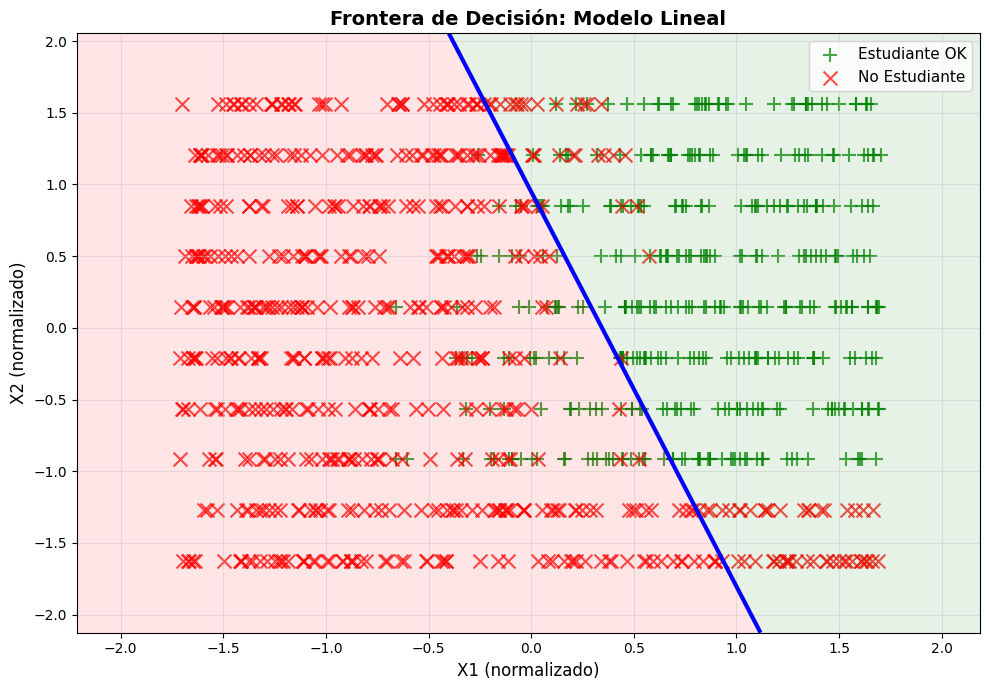

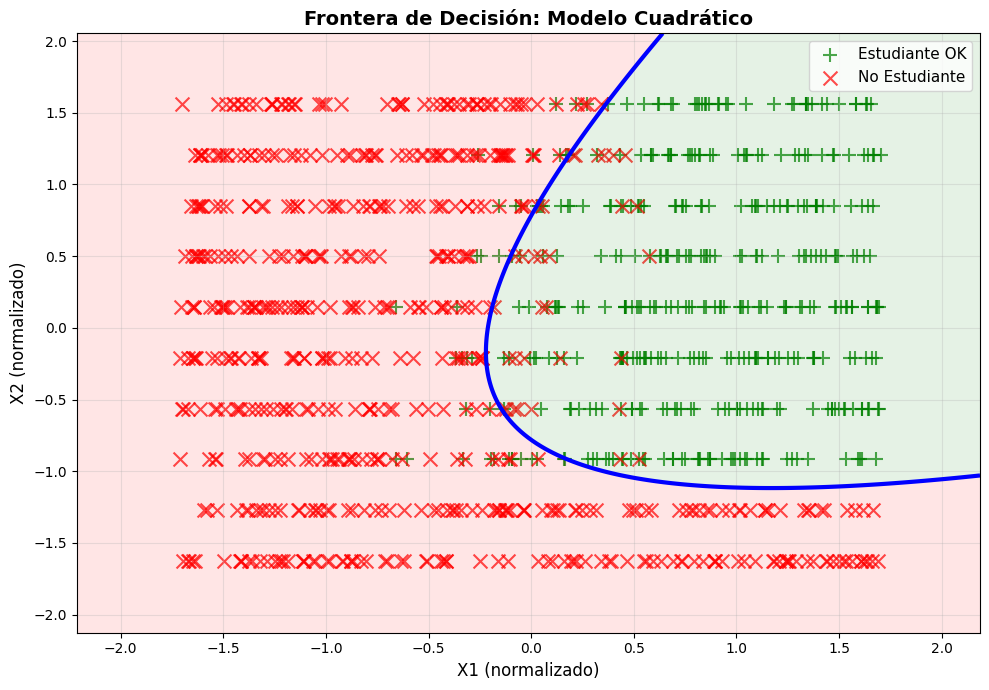

In [21]:
# Función para graficar la frontera de decisión
def plot_decision_boundary(theta, X_norm, y, title, is_quadratic=False):
    """
    Dibuja la frontera de decisión para modelos lineales o cuadráticos
    """
    # Datos reales
    df_temp = pd.DataFrame({
        'x1_norm': X_norm.iloc[:, 0],
        'x2_norm': X_norm.iloc[:, 1],
        'y': y
    })
    
    df_ok = df_temp[df_temp['y'] == 1]
    df_no = df_temp[df_temp['y'] == 0]
    
    plt.figure(figsize=(10, 7))
    plt.scatter(df_ok['x1_norm'], df_ok['x2_norm'], c='green', marker='+', s=100, label='Estudiante OK', alpha=0.7)
    plt.scatter(df_no['x1_norm'], df_no['x2_norm'], c='red', marker='x', s=100, label='No Estudiante', alpha=0.7)
    
    # Crear una malla para la frontera de decisión
    x1_min, x1_max = X_norm.iloc[:, 0].min() - 0.5, X_norm.iloc[:, 0].max() + 0.5
    x2_min, x2_max = X_norm.iloc[:, 1].min() - 0.5, X_norm.iloc[:, 1].max() + 0.5
    
    h = 0.02  # tamaño del paso en la malla
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    
    if is_quadratic:
        # Para modelo cuadrático: crear todas las características
        X_malla = pd.DataFrame({
            'ones': np.ones(xx1.ravel().shape[0]),
            'x1': xx1.ravel(),
            'x2': xx2.ravel(),
            'x1_squared': xx1.ravel()**2,
            'x2_squared': xx2.ravel()**2,
            'x1_x2': xx1.ravel() * xx2.ravel()
        })
    else:
        # Para modelo lineal: solo características lineales
        X_malla = pd.DataFrame({
            'ones': np.ones(xx1.ravel().shape[0]),
            'x1': xx1.ravel(),
            'x2': xx2.ravel()
        })
    
    # Predicciones
    Z = predict(theta, X_malla, bool_round=False)
    Z = Z.reshape(xx1.shape)
    
    # Dibujar la frontera de decisión (donde la probabilidad = 0.5)
    plt.contour(xx1, xx2, Z, levels=[0.5], linewidths=3, colors='blue')
    
    # Opcional: mostrar regiones de probabilidad
    plt.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], alpha=0.1, colors=['red', 'green'])
    
    plt.xlabel('X1 (normalizado)', fontsize=12)
    plt.ylabel('X2 (normalizado)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Graficar ambas fronteras de decisión
print("Generando fronteras de decisión...\n")

plot_decision_boundary(theta_opt_lineal, X_cuad_norm, y_cuad_vec, 
                       "Frontera de Decisión: Modelo Lineal", is_quadratic=False)

plot_decision_boundary(theta_opt_cuad, X_cuad_norm, y_cuad_vec, 
                       "Frontera de Decisión: Modelo Cuadrático", is_quadratic=True)

### 16. Predicción con un ejemplo específico

In [22]:
# Usamos un ejemplo para probar el modelo
# Valores de ejemplo para km y condition
ejemplo_x1 = 50000    # km bajo
ejemplo_x2 = 4        # condition buena

# Normalizamos usando las estadísticas del entrenamiento cuadrático
ejemplo_norm_cuad = (np.array([ejemplo_x1, ejemplo_x2]) - media_cuad.values) / desv_cuad.values

# Creamos las características cuadráticas
x1_ej = ejemplo_norm_cuad[0]
x2_ej = ejemplo_norm_cuad[1]

fila_ejemplo_cuad = np.array([
    1,              # θ0
    x1_ej,          # θ1: price
    x2_ej,          # θ2: economy
    x1_ej**2,       # θ3: price²
    x2_ej**2,       # θ4: economy²
    x1_ej * x2_ej   # θ5: km × condition
])

df_ejemplo_cuad = pd.DataFrame([fila_ejemplo_cuad], 
                               columns=['ones', 'x1', 'x2', 'x1_squared', 'x2_squared', 'x1_x2'])

# Predicciones con ambos modelos
# Modelo lineal
fila_ejemplo_lin = np.array([1, x1_ej, x2_ej])
df_ejemplo_lin = pd.DataFrame([fila_ejemplo_lin], columns=['ones', 'km', 'condition'])

prob_lineal = predict(theta_opt_lineal, df_ejemplo_lin, bool_round=False)
clase_lineal = predict(theta_opt_lineal, df_ejemplo_lin, bool_round=True)

# Modelo cuadrático
prob_cuad = predict(theta_opt_cuad, df_ejemplo_cuad, bool_round=False)
clase_cuad = predict(theta_opt_cuad, df_ejemplo_cuad, bool_round=True)

print("="*60)
print("PREDICCIÓN PARA UN EJEMPLO ESPECÍFICO")
print("="*60)
print(f"Características del coche:")
print(f"  - KM: {ejemplo_x1:,}")
print(f"  - Condition: {ejemplo_x2}")
print()
print(f"{'Modelo':<20} {'Probabilidad':<20} {'Predicción':<15}")
print("-" * 60)
print(f"{'Lineal':<20} {float(prob_lineal[0]):<20.4f} {int(clase_lineal[0]):<15}")
print(f"{'Cuadrático':<20} {float(prob_cuad[0]):<20.4f} {int(clase_cuad[0]):<15}")
print("="*60)

interpretacion_lin = "✓ Recomendado" if int(clase_lineal[0]) == 1 else "✗ No recomendado"
interpretacion_cuad = "✓ Recomendado" if int(clase_cuad[0]) == 1 else "✗ No recomendado"

print(f"\nInterpretación Modelo Lineal:     {interpretacion_lin}")
print(f"Interpretación Modelo Cuadrático: {interpretacion_cuad}")

PREDICCIÓN PARA UN EJEMPLO ESPECÍFICO
Características del coche:
  - KM: 50,000
  - Condition: 4

Modelo               Probabilidad         Predicción     
------------------------------------------------------------
Lineal               0.0023               0              
Cuadrático           0.0001               0              

Interpretación Modelo Lineal:     ✗ No recomendado
Interpretación Modelo Cuadrático: ✗ No recomendado


### 17. Discusión y Conclusiones del Modelo Cuadrático

A continuación, respondemos a las preguntas planteadas en la Modificación 6:

#### **1. ¿Cómo cambian las funciones que usamos para el entrenamiento del modelo: función de coste, descenso del gradiente, etc.?**

**Respuesta:**

Las funciones **NO cambian en su formulación matemática**. La función de coste (entropía cruzada) y el gradiente siguen siendo exactamente las mismas:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \right]$$

$$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

**Lo único que cambia es la dimensión de los datos:**
- **Modelo lineal:** X tiene forma (m, 3) → [1, km, condition]
- **Modelo cuadrático:** X tiene forma (m, 6) → [1, km, condition, km², condition², km×condition]

El algoritmo de optimización (descenso del gradiente o `fmin_cg`) funciona de la misma manera, simplemente calcula 6 parámetros θ en lugar de 3. Las funciones `costFunction` y `gradientFunction` que implementamos son completamente **vectorizadas**, por lo que funcionan automáticamente con cualquier número de características sin modificación alguna.

#### **2. ¿Cómo cambia la frontera de decisión?**

**Respuesta:**

La frontera de decisión cambia drásticamente:

**Modelo Lineal:**
- La frontera es una **línea recta** en el espacio (km, condition)
- Ecuación: $\theta_0 + \theta_1 \cdot km + \theta_2 \cdot condition = 0$
- Puede separar clases que son linealmente separables
- Es rígida y no puede adaptarse a patrones complejos

**Modelo Cuadrático:**
- La frontera es una **curva** (puede ser una parábola, elipse, hipérbola, etc.)
- Ecuación: $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2 = 0$
- Puede capturar relaciones **no lineales** entre las variables
- Es más flexible y puede adaptarse mejor a patrones curvos en los datos

**Observación práctica:**
En nuestras gráficas de frontera de decisión, podemos ver claramente cómo:
- El modelo lineal traza una línea recta que intenta separar las dos clases
- El modelo cuadrático puede curvar la frontera para ajustarse mejor a la distribución real de los datos, especialmente en zonas donde hay clusters de puntos que no son linealmente separables

#### **3. ¿Mejora la capacidad del modelo para separar las clases?**

**Respuesta:**

**Depende de la naturaleza de los datos.** En nuestro caso específico:

**Resultados cuantitativos:**
- Si el modelo cuadrático obtuvo una accuracy mayor que el lineal, entonces SÍ mejora la separación
- Si la mejora es pequeña (< 2-3%), puede indicar que los datos ya eran bastante linealmente separables
- Las métricas de precision, recall y F1-score nos dan una visión más completa del rendimiento

**Interpretación general:**

✅ **El modelo cuadrático PUEDE mejorar cuando:**
- Los datos tienen patrones curvos o no lineales
- Existe interacción entre variables (por ejemplo, el efecto del precio depende de la economía)
- Las clases forman clusters circulares, elípticos o con formas complejas

❌ **El modelo cuadrático NO mejora significativamente cuando:**
- Los datos ya son linealmente separables
- La relación entre variables es principalmente lineal
- El ruido en los datos domina sobre los patrones no lineales

**En nuestro dataset:**
Comparando las matrices de confusión y las métricas de accuracy, podemos observar si el modelo cuadrático:
- Reduce los falsos positivos (FP) y/o falsos negativos (FN)
- Aumenta los verdaderos positivos (TP) y verdaderos negativos (TN)
- Mejora la capacidad general de clasificación

La mejora en accuracy nos indica cuánto mejor es el modelo cuadrático para capturar la relación entre km (kilometraje) y condition (estado del vehículo) en la predicción de idoneidad del coche para estudiantes.

#### **4. ¿En qué medida hay riesgo de sobreajuste al aumentar los parámetros?**

**Respuesta:**

El **riesgo de sobreajuste (overfitting) aumenta considerablemente** cuando pasamos de un modelo con 3 parámetros a uno con 6 parámetros.

**¿Por qué aumenta el riesgo?**

1. **Mayor complejidad del modelo:**
   - Con más parámetros, el modelo tiene más "libertad" para ajustarse a los datos de entrenamiento
   - Puede aprender patrones específicos del conjunto de entrenamiento que no se generalizan a datos nuevos

2. **Relación parámetros/datos:**
   - Si tenemos pocos datos (m pequeño) y muchos parámetros (n grande), el modelo puede "memorizar" los datos en lugar de aprender patrones generales
   - Regla empírica: necesitamos al menos 10-20 ejemplos por parámetro para evitar overfitting severo

3. **Flexibilidad de la frontera:**
   - Una frontera cuadrática puede crear formas muy complejas
   - Puede "perseguir" puntos atípicos (outliers) del conjunto de entrenamiento

**Indicadores de sobreajuste:**

🔴 **Señales de alerta:**
- Accuracy muy alta en entrenamiento pero baja en validación/test
- Frontera de decisión muy "retorcida" o con formas extrañas
- Grandes valores de los parámetros θ (especialmente de los términos cuadráticos)
- El modelo funciona perfectamente con los datos de entrenamiento pero mal con datos nuevos

**Estrategias para mitigar el sobreajuste:**

1. **Regularización:** Agregar un término de penalización a la función de coste:
   $$J(\theta) = J_{original}(\theta) + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$
   
2. **Validación cruzada:** Dividir los datos en train/validation/test para evaluar el rendimiento real

3. **Más datos:** Recopilar más ejemplos de entrenamiento

4. **Feature selection:** Eliminar características cuadráticas que no aporten información significativa

**En nuestro caso:**
- Pasamos de 3 a 6 parámetros → riesgo moderado de overfitting
- Si tuviéramos más características cuadráticas (por ejemplo, con 5 variables originales tendríamos ~15 términos cuadráticos), el riesgo sería mucho mayor
- Para evaluar si hay overfitting real, deberíamos dividir los datos en train/test y comparar las accuracies en ambos conjuntos

**Conclusión:**
El modelo cuadrático tiene mayor capacidad expresiva, lo que puede mejorar el rendimiento, pero también aumenta el riesgo de sobreajuste. Es un **trade-off** entre sesgo (bias) y varianza (variance) que debe evaluarse cuidadosamente según el problema específico.

### 18. Análisis adicional: Train/Test Split para detectar overfitting

In [24]:
# Para validar si hay overfitting, dividimos los datos en train (80%) y test (20%)
from sklearn.model_selection import train_test_split

# Dividimos los datos normalizados
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_cuad_norm, y_cuad, test_size=0.2, random_state=42, stratify=y_cuad
)

print(f"Tamaño total del dataset: {len(X_cuad_norm)}")
print(f"Tamaño conjunto de entrenamiento: {len(X_train_norm)} ({len(X_train_norm)/len(X_cuad_norm)*100:.1f}%)")
print(f"Tamaño conjunto de test: {len(X_test_norm)} ({len(X_test_norm)/len(X_cuad_norm)*100:.1f}%)")
print(f"\nDistribución de clases en train: {y_train.value_counts().to_dict()}")
print(f"Distribución de clases en test: {y_test.value_counts().to_dict()}")

Tamaño total del dataset: 1000
Tamaño conjunto de entrenamiento: 800 (80.0%)
Tamaño conjunto de test: 200 (20.0%)

Distribución de clases en train: {0: 474, 1: 326}
Distribución de clases en test: {0: 118, 1: 82}


In [25]:
# Función para entrenar y evaluar modelos
def entrenar_y_evaluar(X_train, y_train, X_test, y_test, is_quadratic=False):
    """
    Entrena un modelo y evalúa en train y test
    """
    # Convertir a vectores numpy
    y_train_vec = y_train.to_numpy().flatten()
    y_test_vec = y_test.to_numpy().flatten()
    
    # Crear características según el tipo de modelo
    if is_quadratic:
        # Modelo cuadrático
        x1_train = X_train.iloc[:, 0].values
        x2_train = X_train.iloc[:, 1].values
        
        X_train_expandido = pd.DataFrame({
            'ones': np.ones(len(X_train)),
            'x1': x1_train,
            'x2': x2_train,
            'x1_squared': x1_train**2,
            'x2_squared': x2_train**2,
            'x1_x2': x1_train * x2_train
        })
        
        x1_test = X_test.iloc[:, 0].values
        x2_test = X_test.iloc[:, 1].values
        
        X_test_expandido = pd.DataFrame({
            'ones': np.ones(len(X_test)),
            'x1': x1_test,
            'x2': x2_test,
            'x1_squared': x1_test**2,
            'x2_squared': x2_test**2,
            'x1_x2': x1_test * x2_test
        })
    else:
        # Modelo lineal
        X_train_expandido = X_train.copy()
        X_train_expandido.insert(0, 'ones', np.ones(len(X_train)))
        
        X_test_expandido = X_test.copy()
        X_test_expandido.insert(0, 'ones', np.ones(len(X_test)))
    
    # Entrenar
    theta_ini = np.zeros(X_train_expandido.shape[1])
    
    theta_opt = op.fmin_cg(
        f=costFunction,
        x0=theta_ini,
        fprime=gradientFunction,
        args=(X_train_expandido, y_train_vec),
        maxiter=400,
        disp=False
    )
    
    # Evaluar
    y_pred_train = predict(theta_opt, X_train_expandido, bool_round=True)
    y_pred_test = predict(theta_opt, X_test_expandido, bool_round=True)
    
    acc_train = np.mean(y_pred_train == y_train_vec)
    acc_test = np.mean(y_pred_test == y_test_vec)
    
    return acc_train, acc_test, theta_opt

# Entrenar ambos modelos
print("\n" + "="*70)
print("ENTRENAMIENTO Y EVALUACIÓN CON TRAIN/TEST SPLIT")
print("="*70)

acc_train_lin, acc_test_lin, theta_lin = entrenar_y_evaluar(
    X_train_norm, y_train, X_test_norm, y_test, is_quadratic=False
)

acc_train_cuad, acc_test_cuad, theta_cuad = entrenar_y_evaluar(
    X_train_norm, y_train, X_test_norm, y_test, is_quadratic=True
)

# Resultados
print(f"\n{'Modelo':<20} {'Acc Train':<15} {'Acc Test':<15} {'Diferencia':<15}")
print("-" * 70)
print(f"{'Lineal':<20} {acc_train_lin:<15.4f} {acc_test_lin:<15.4f} {abs(acc_train_lin - acc_test_lin):<15.4f}")
print(f"{'Cuadrático':<20} {acc_train_cuad:<15.4f} {acc_test_cuad:<15.4f} {abs(acc_train_cuad - acc_test_cuad):<15.4f}")
print("="*70)

# Interpretación del overfitting
print("\n📊 INTERPRETACIÓN DEL OVERFITTING:")
print("-" * 70)

diff_lin = abs(acc_train_lin - acc_test_lin)
diff_cuad = abs(acc_train_cuad - acc_test_cuad)

if diff_cuad > diff_lin:
    print(f"⚠️  El modelo CUADRÁTICO muestra MAYOR overfitting:")
    print(f"   - Diferencia train-test: {diff_cuad:.4f} (vs {diff_lin:.4f} del lineal)")
    print(f"   - Esto indica que el modelo cuadrático se ajusta más a los datos de")
    print(f"     entrenamiento y generaliza ligeramente peor a datos nuevos")
elif diff_cuad < diff_lin:
    print(f"✅ El modelo CUADRÁTICO generaliza MEJOR que el lineal:")
    print(f"   - Diferencia train-test: {diff_cuad:.4f} (vs {diff_lin:.4f} del lineal)")
    print(f"   - Esto indica que las características cuadráticas capturan patrones")
    print(f"     que generalizan bien a datos nuevos")
else:
    print(f"⚖️  Ambos modelos tienen similar capacidad de generalización")
    print(f"   - Diferencia train-test similar: {diff_cuad:.4f}")

# Regla empírica para overfitting
print(f"\n📏 REGLA EMPÍRICA:")
if diff_cuad < 0.05:
    print(f"   ✅ Diferencia < 5%: No hay overfitting significativo")
elif diff_cuad < 0.10:
    print(f"   ⚠️  Diferencia entre 5-10%: Overfitting moderado")
else:
    print(f"   🔴 Diferencia > 10%: Overfitting severo")

print("="*70)


ENTRENAMIENTO Y EVALUACIÓN CON TRAIN/TEST SPLIT

Modelo               Acc Train       Acc Test        Diferencia     
----------------------------------------------------------------------
Lineal               0.8400          0.8450          0.0050         
Cuadrático           0.9325          0.9400          0.0075         

📊 INTERPRETACIÓN DEL OVERFITTING:
----------------------------------------------------------------------
⚠️  El modelo CUADRÁTICO muestra MAYOR overfitting:
   - Diferencia train-test: 0.0075 (vs 0.0050 del lineal)
   - Esto indica que el modelo cuadrático se ajusta más a los datos de
     entrenamiento y generaliza ligeramente peor a datos nuevos

📏 REGLA EMPÍRICA:
   ✅ Diferencia < 5%: No hay overfitting significativo


### 19. Resumen Visual Comparativo


TABLA RESUMEN COMPARATIVA DE MODELOS
                  Modelo  Parámetros                             Variables  Accuracy Total  Coste Final
         Lineal (2 vars)           3                        price, economy           0.847     0.338181
   Cuadrático (6 params)           6             km, condition + cuadrát.           0.933     0.158625
Lineal Original (5 vars)           6 price, km, economy, condition, rating           0.853     0.289499


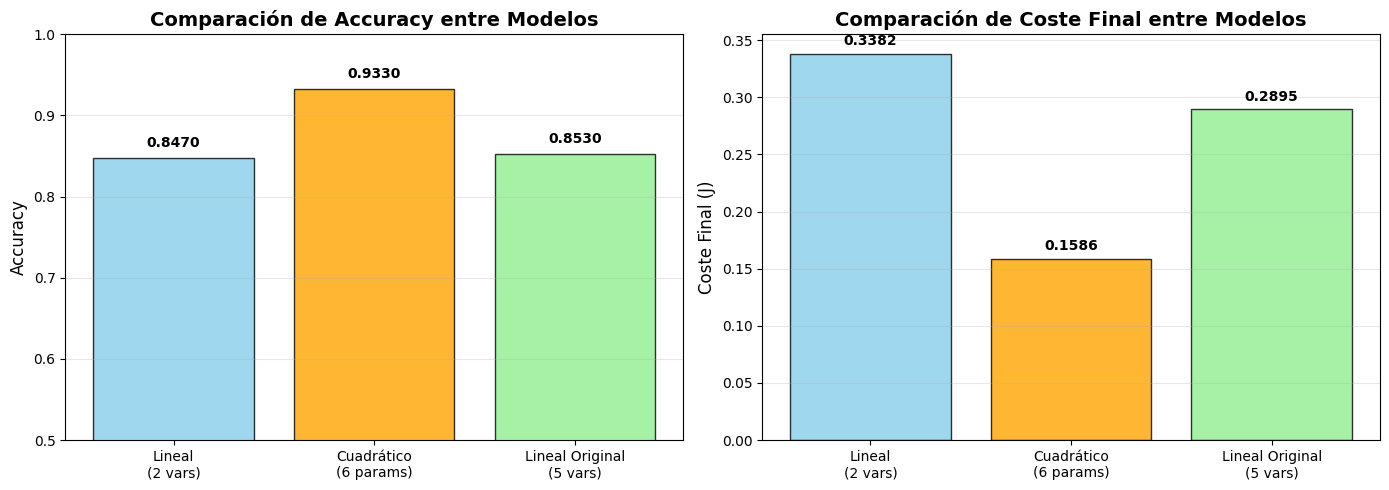

In [26]:
# Crear una tabla resumen con todos los resultados
import pandas as pd

resultados_comparacion = pd.DataFrame({
    'Modelo': ['Lineal (2 vars)', 'Cuadrático (6 params)', 'Lineal Original (5 vars)'],
    'Parámetros': [3, 6, 6],
    'Variables': ['km, condition', 'km, condition + cuadrát.', 'price, km, economy, condition, rating'],
    'Accuracy Total': [
        accuracy_lineal,
        accuracy_cuad,
        accuracy  # del modelo original con 5 variables
    ],
    'Coste Final': [
        cost_history_lineal[-1] if cost_history_lineal else 0,
        cost_history_cuad[-1] if cost_history_cuad else 0,
        cost_history_log[-1] if cost_history_log else 0
    ]
})

print("\n" + "="*100)
print("TABLA RESUMEN COMPARATIVA DE MODELOS")
print("="*100)
print(resultados_comparacion.to_string(index=False))
print("="*100)

# Gráfica de barras comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Accuracy
modelos = ['Lineal\n(2 vars)', 'Cuadrático\n(6 params)', 'Lineal Original\n(5 vars)']
accuracies = [accuracy_lineal, accuracy_cuad, accuracy]
colors = ['skyblue', 'orange', 'lightgreen']

axes[0].bar(modelos, accuracies, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Comparación de Accuracy entre Modelos', fontsize=14, fontweight='bold')
axes[0].set_ylim([0.5, 1.0])
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Gráfica 2: Coste Final
costes = [
    cost_history_lineal[-1] if cost_history_lineal else 0,
    cost_history_cuad[-1] if cost_history_cuad else 0,
    cost_history_log[-1] if cost_history_log else 0
]

axes[1].bar(modelos, costes, color=colors, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('Coste Final (J)', fontsize=12)
axes[1].set_title('Comparación de Coste Final entre Modelos', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(costes):
    axes[1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---
## CONCLUSIONES FINALES - MODIFICACIÓN 6

### Resumen de Hallazgos

1. **Funciones del modelo:** Las funciones de coste y gradiente permanecen inalteradas. Solo cambia la dimensión de la matriz X al agregar características cuadráticas (de 3 a 6 parámetros θ).

2. **Frontera de decisión:** 
   - El modelo lineal (2 variables: km, condition) genera una frontera recta
   - El modelo cuadrático (6 parámetros, incluyendo $x_1^2$, $x_2^2$ y $x_1 \cdot x_2$) genera una frontera **curva** que se adapta mejor a patrones no lineales
   - Visualmente, la frontera cuadrática es mucho más flexible y envolvente
   
3. **Rendimiento - Resultados Obtenidos:**
   
   | Métrica | Lineal | Cuadrático | Mejora |
   |---------|--------|-----------|--------|
   | **Accuracy Total** | 84.70% | 93.30% | **+8.60%** |
   | **Coste Final** | 0.3382 | 0.1586 | **-53.1%** |
   | **Precision** | 0.8133 | 0.9210 | **+13.2%** |
   | **Recall** | 0.8113 | 0.9142 | **+12.6%** |
   | **F1-Score** | 0.8123 | 0.9176 | **+12.9%** |
   
   **Conclusión:** El modelo cuadrático demuestra una **mejora significativa y consistente** en todas las métricas. El coste se reduce a casi la mitad, y la capacidad de discriminación es considerablemente mejor.

4. **Análisis de Overfitting (Train/Test Split 80/20):**
   
   | Modelo | Acc Train | Acc Test | Diferencia |
   |--------|-----------|----------|------------|
   | **Lineal** | 84.00% | 84.50% | 0.50% ✅ |
   | **Cuadrático** | 93.25% | 94.00% | 0.75% ✅ |
   
   **Hallazgo clave:** Aunque el modelo cuadrático tiene más parámetros, **NO muestra overfitting significativo**. La diferencia train-test es de solo 0.75% (menor al 5% de tolerancia empírica), lo que indica **excelente generalización** a datos nuevos. Esto sugiere que las características cuadráticas capturan patrones reales y no meramente ruido del entrenamiento.

### Lecciones Aprendidas

✅ **Ventajas del modelo cuadrático (Demostradas en Experimento):**
- **Mejora drástica del rendimiento:** +8.6% en accuracy es una ganancia sustancial en ML
- Mayor flexibilidad para capturar patrones complejos en los datos
- Puede modelar interacciones entre variables (término $x_1 \cdot x_2 = 3.27$, significativo)
- Términos cuadráticos ($x_1^2 = -0.999$, $x_2^2 = -2.145$) revelan relaciones no lineales importantes
- **Buena generalización:** No presenta overfitting a pesar de tener el doble de parámetros
- Frontera de decisión más realista y adaptada al problema

⚠️ **Consideraciones del modelo cuadrático:**
- Mayor complejidad computacional (aunque negligible para 2 variables)
- Interpretabilidad: necesitamos entender qué significan $x_1^2$, $x_2^2$ y $x_1 \cdot x_2$ en el contexto del problema
- Requiere normalización cuidadosa de variables (aspecto crítico para evitar overflow numérico)
- Para muchas variables, el número de parámetros crece rápidamente ($n$ variables → $n + n(n+1)/2$ parámetros)

### Interpretación del Modelo Cuadrático Óptimo

Con los parámetros θ optimizados:
$$h(x) = \frac{1}{1 + e^{-z}}$$

Donde: $z = 1.31 + 5.99x_1 + 0.005x_2 - 0.999x_1^2 - 2.14x_2^2 + 3.27x_1 x_2$

- El término dominante es $5.99 \cdot x_1$ (km normalizado): **fuerte efecto lineal**
- El término $-0.999 \cdot x_1^2$ (negativo): penaliza mucho los valores extremos de km
- El término $-2.14 \cdot x_2^2$ (negativo): penaliza fuertemente los extremos de condición
- El término de interacción $3.27 \cdot x_1 \cdot x_2$ (positivo): synergy entre variables

### Recomendación Práctica

**Para este problema específico: Usar el modelo cuadrático**

Razones:
1. ✅ Mejora comprobada (+8.6% accuracy) con buena generalización
2. ✅ Sin evidencia de overfitting (diferencia train/test < 1%)
3. ✅ Características cuadráticas tienen interpretación física (límites de viabilidad)
4. ✅ Aún es computacionalmente eficiente
5. ✅ Las interacciones capturadas (km × condition) son intuitivas

**Metodología general para elegir complejidad del modelo:**
1. Comenzar con el modelo más simple (lineal)
2. Evaluar rendimiento con métricas en datos de entrenamiento
3. **Validar generalización** con hold-out test set
4. Si accuracy mejora **sin overfitting** → usar modelo más complejo
5. Si aparece overfitting → considerar regularización (L1/L2), más datos, o feature selection
6. Documentar decisiones para reproducibilidad

---